# Lending Club Case Study
The case study is divided into 4 parts :
1. Data Understanding 
2. Data Cleaning 
3. Data Analysis
4. Recommendations 

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
loan_data = pd.read_csv("loan.csv")

In [3]:
#getting information about the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
#to display all the columns 
pd.set_option('display.max_columns',None)

# Data Understanding

In [5]:
# checking first few records
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
# to get the shape in terms of rows and columns
loan_data.shape

(39717, 111)

In [7]:
# to display all the rows
pd.set_option('display.max_rows',None)

In [8]:
# to get the data types of all the columns
loan_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

# Data Cleaning

In [9]:
# finding number of missing values in each column 
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


we can see that many columns have all the values as null so removing those columns first.

In [10]:
#drop all cols which are completely null
loan_data.dropna(axis = 1, how = 'all', inplace = True)
print(loan_data.shape)

(39717, 57)


In [11]:
# identifying single valued columns
loan_data.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
pymnt_plan                     1
initial_list_status            1
term                           2
next_pymnt_d                   2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
dtype: int64

 'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan' columns have only one unique value in all the rows, which will not give any usefull info for us. so, lets remove them.

In [12]:
single_value_col = ['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 
                    'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan']
loan_data.drop(single_value_col, axis = 1, inplace = True)
print(loan_data.shape)

(39717, 48)


In [13]:
#Finding number of unique values, printing high unique valued columns
loan_data.nunique().sort_values(ascending=False).head(20)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
dtype: int64

id, url, and member_id having all unique values which means these will not help in the analysis for this case study so removing these columns

In [14]:
loan_data.drop(['id','member_id', 'url'], axis=1, inplace=True)
print(loan_data.shape)

(39717, 45)


# Data Analysis
The objective here is to identify key indicators of default so that at the time of loan application, we can use those variables for approval/rejection of the loan.
The customer behaviour variables not available at the time of loan application, and thus they cannot be used as indicators approval/rejection of the loan 

Thus, going forward, we will not use below mentioned customer behaviour columns: 
delinq_2yrs,
earliest_cr_line,
inq_last_6mths,
open_acc,
pub_rec,
revol_bal,
revol_util,
total_acc,
out_prncp,
out_prncp_inv,
total_pymnt,
total_pymnt_inv,
total_rec_prncp,
total_rec_int,
total_rec_late_fee,
recoveries,
collection_recovery_fee,
last_pymnt_d,
last_pymnt_amnt,
last_credit_pull_d

In [15]:
behaviour_value_col = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util',
                       'total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp'
                       ,'total_rec_int', 'total_rec_late_fee','recoveries','collection_recovery_fee',
                       'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
loan_data.drop(behaviour_value_col, axis = 1, inplace = True)
print(loan_data.shape)

(39717, 25)


In [16]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [17]:
# we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus lets remove all these variables as well

loan_data = loan_data.drop(['title', 'zip_code', 'addr_state'], axis=1)
print(loan_data.shape)

(39717, 22)


The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.

In [18]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
#finding out the missing values percentage from the latest data
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.185033
emp_length                  2.677761
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
desc                       32.472717
purpose                     0.000000
dti                         0.000000
mths_since_last_delinq     64.559193
mths_since_last_record     92.897322
next_pymnt_d              100.000000
pub_rec_bankruptcies        1.806776
dtype: float64

In [20]:
# next_pymnt_d, mths_since_last_record, mths_since_last_delinq have more than 60% missing lavles hence removing these columns.
# desc, emp_title are text columns not useful for this analysis so removing that 

drop_cols = ['next_pymnt_d','mths_since_last_delinq','mths_since_last_record','desc','emp_title']
loan_data.drop(drop_cols, axis = 1, inplace = True)

In [21]:
#finding out the missing values percentage from the latest data
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

## Handling Missing values
columns with missing values are "emp_length", "pub_rec_bankruptcies ".
So before doing that, lets see what kind of data each column has.

In [22]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [23]:
#filling the missing value with mode value of emp_length
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [24]:
#Ignore Null Rows where it doesn't makesense to replace it with mean, meadian or mode for pub_rec_bankruptcies
loan_data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [25]:
#checking missing values in the final dataset
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

## Formatting the columns to correct the data types

In [26]:
loan_data.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [27]:
#Checking unique values for term column
loan_data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [28]:
#Removing empty space in values in term
loan_data['term'] = loan_data.term.str.strip()
loan_data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [29]:
#stripping '%' value from int_rate
loan_data['int_rate'] = loan_data.int_rate.str.strip('%').astype(float)

In [30]:
#converting to date type
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')

In [31]:
#"emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))

In [32]:
loan_data.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
dti                            float64
pub_rec_bankruptcies           float64
dtype: object

In [33]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0.0


In [34]:
loan_data.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [35]:
loan_data.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [36]:
loan_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [37]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [38]:
loan_data.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [39]:
loan_data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

## Derived Columns
1. Add year,month,weekday using issue_d
2. Assign valus as 0 amd 1 to loan_status 'Fully Paid', 'Charged Off' correspondigly 

In [40]:
#issue_d column
loan_data['issue_d_year'] = loan_data.issue_d.dt.year
loan_data['issue_d_month'] = loan_data.issue_d.dt.strftime('%b')
loan_data['issue_d_weekday'] = loan_data.issue_d.dt.weekday
#data type conversion of year and weekday
loan_data['issue_d_year'] = loan_data['issue_d_year'].astype(object)
loan_data['issue_d_weekday'] = loan_data['issue_d_weekday'].astype(object)
loan_data['loan_status']=loan_data.apply(lambda x : 1 if x['loan_status']=='Charged Off' else 0,axis=1)


In [41]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,0,credit_card,27.65,0.0,2011,Dec,3
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,1,car,1.00,0.0,2011,Dec,3
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,0,small_business,8.72,0.0,2011,Dec,3
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,0,other,20.00,0.0,2011,Dec,3
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,0,wedding,11.20,0.0,2011,Dec,3


## Outlier Treatment

<Axes: >

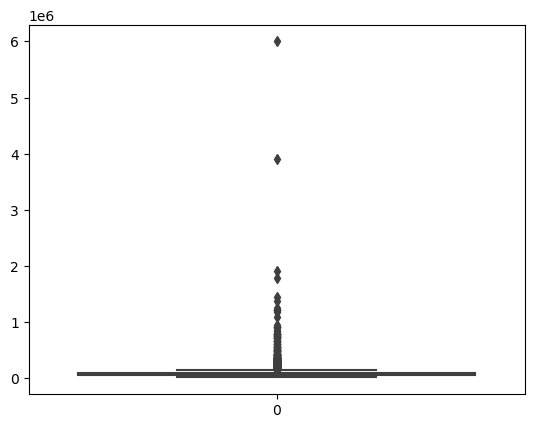

In [42]:
sns.boxplot(loan_data['annual_inc'])

In [43]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    186000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [44]:
#removing outliers as 0.95
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]


<Axes: >

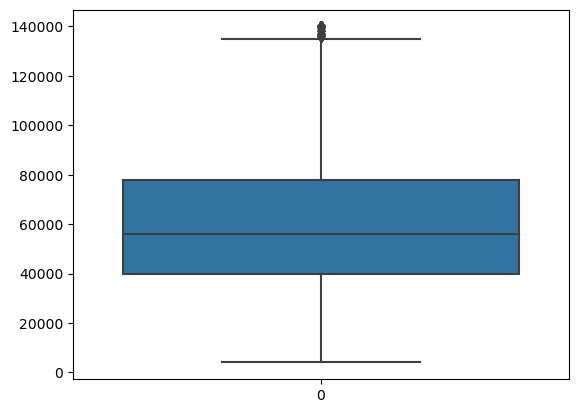

In [45]:
sns.boxplot(loan_data.annual_inc)

<Axes: >

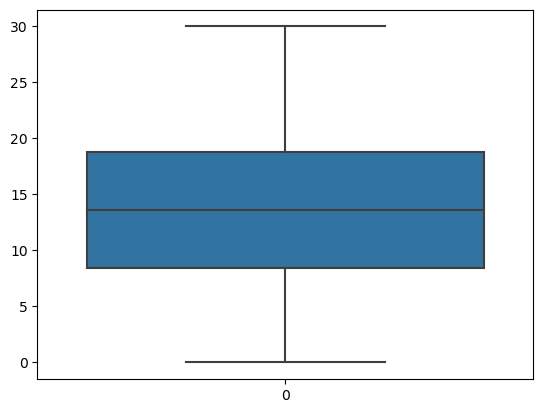

In [46]:
sns.boxplot(loan_data.dti)

<Axes: >

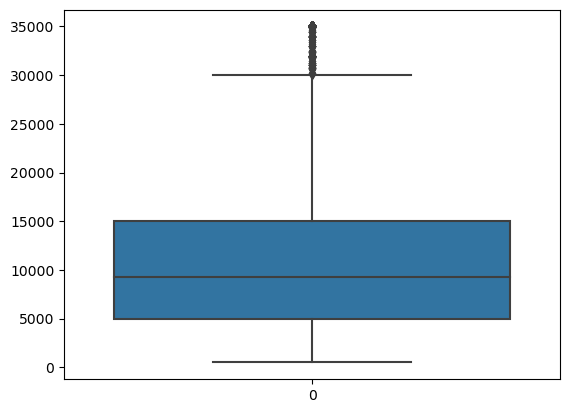

In [47]:
sns.boxplot(loan_data.loan_amnt)

In [48]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25975.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

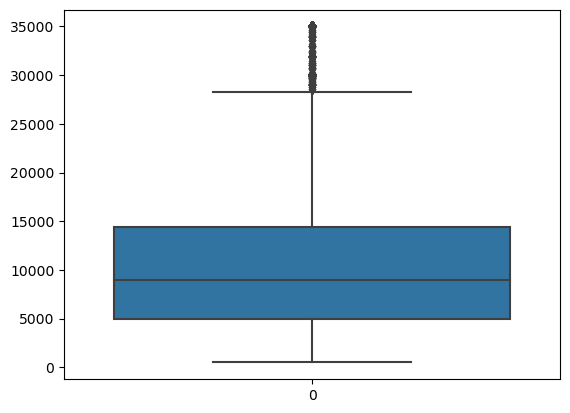

In [49]:
sns.boxplot(loan_data.funded_amnt)

In [50]:
loan_data.funded_amnt.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     9000.0
0.750    14400.0
0.900    20000.0
0.950    25000.0
0.970    25000.0
0.975    26400.0
0.980    28800.0
0.985    30000.0
0.990    34475.0
1.000    35000.0
Name: funded_amnt, dtype: float64

<Axes: >

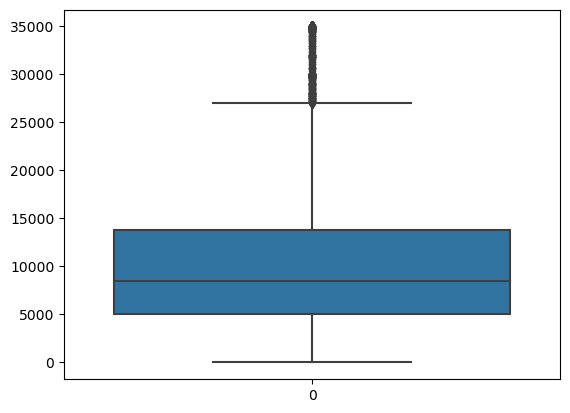

In [51]:
sns.boxplot(loan_data.funded_amnt_inv)

In [52]:
loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8500.000
0.750    13800.000
0.900    19800.000
0.950    23975.000
0.970    24975.000
0.975    25578.125
0.980    27975.000
0.985    29950.000
0.990    32000.000
1.000    35000.000
Name: funded_amnt_inv, dtype: float64

Though there are some values far from distribution, the distribution is pretty continous and there is no need to remove outliers / extreme values for these 3 columns.

## Univariate Analysis

In [53]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,pub_rec_bankruptcies
count,35996.000000,35996.000000,35996.000000,35996.000000,35996.000000,35996.000000,35996.000000,35996.000000,35996.000000
mean,10698.617207,10449.703439,10031.917796,11.910375,311.775880,60918.605010,0.147405,13.489696,0.044699
std,7061.007275,6810.165080,6707.969034,3.686263,199.072103,27737.047051,0.354514,6.655392,0.207317
min,500.000000,500.000000,0.000000,5.420000,16.080000,4000.000000,0.000000,0.000000,0.000000
25%,5000.000000,5000.000000,5000.000000,8.940000,163.110000,40000.000000,0.000000,8.400000,0.000000
50%,9250.000000,9000.000000,8500.000000,11.710000,270.250000,56000.000000,0.000000,13.630000,0.000000
75%,15000.000000,14400.000000,13800.000000,14.420000,408.290000,78000.000000,0.000000,18.750000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,140004.000000,1.000000,29.990000,2.000000


In [54]:
cat_variable = ['term','grade','sub_grade','home_ownership','verification_status','loan_status','purpose','emp_length',
                'issue_d_year','issue_d_month','issue_d_weekday','pub_rec_bankruptcies']
num_variable = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti']

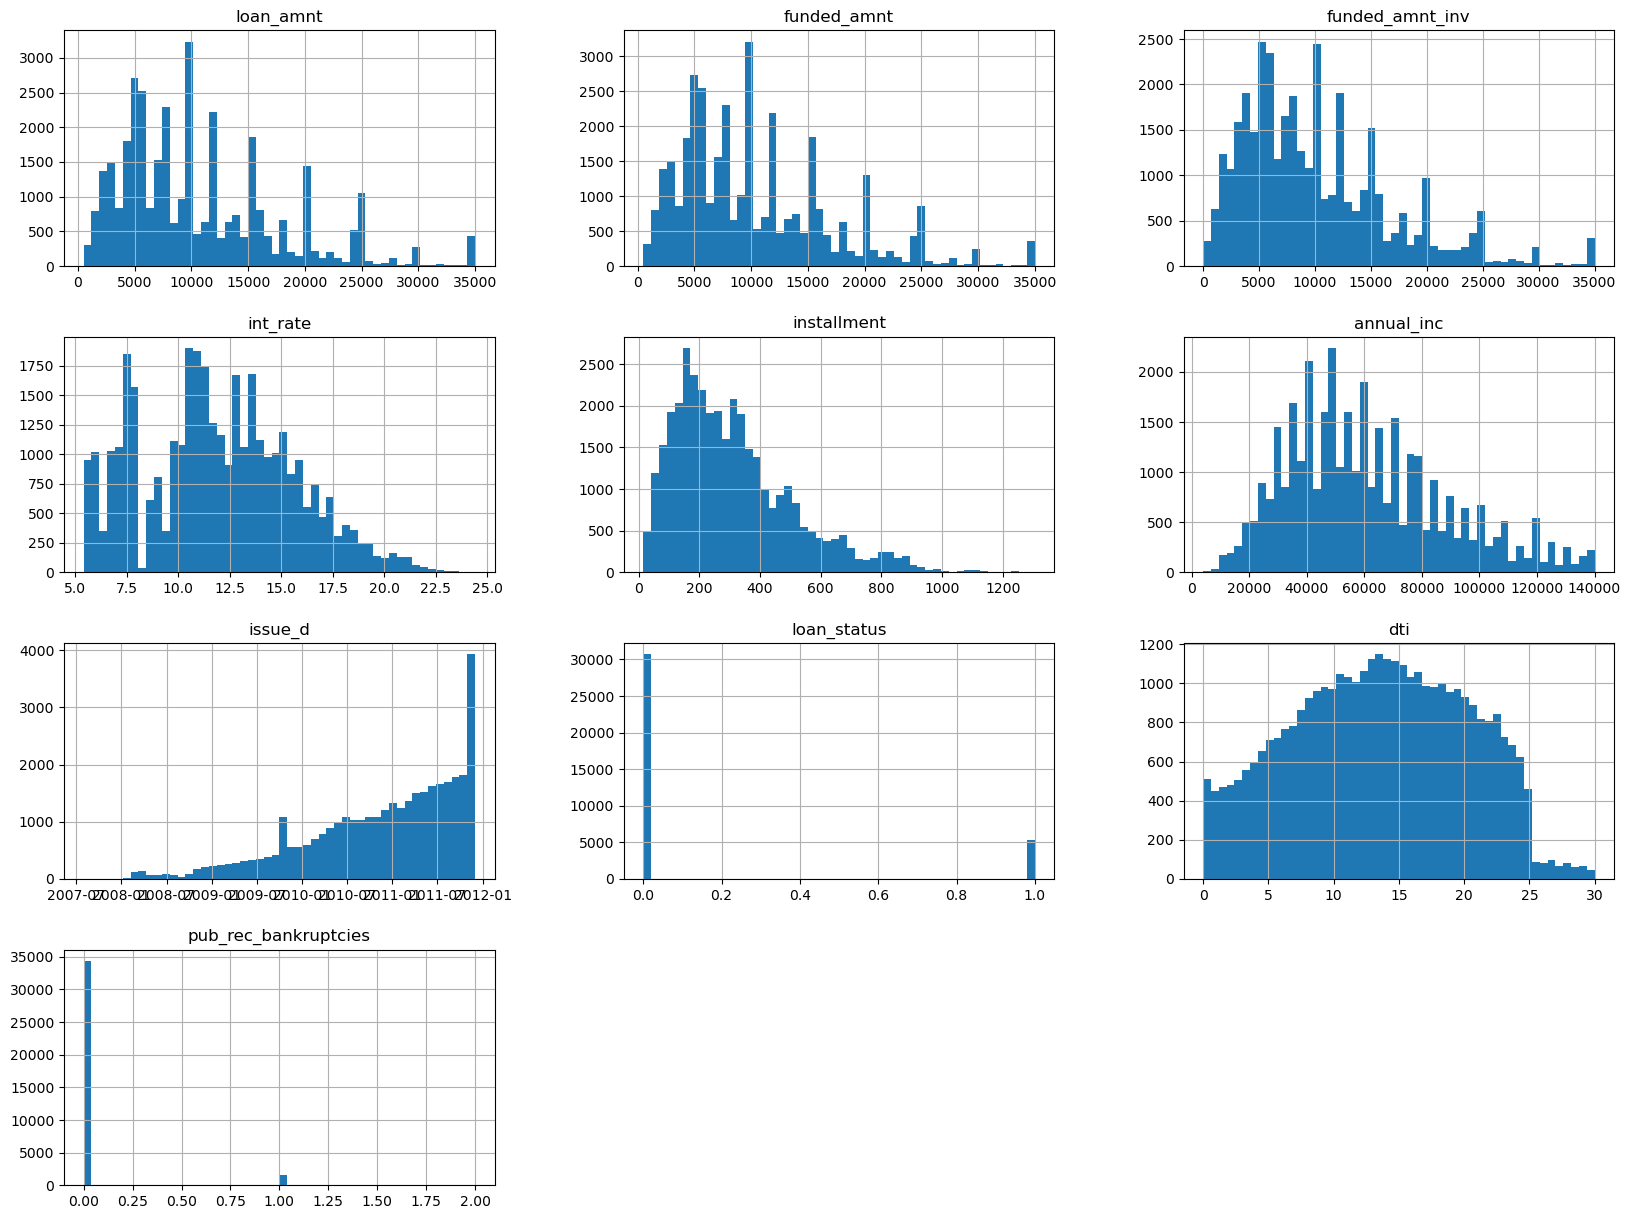

In [55]:
loan_data.hist(bins=50, figsize=(20,15))
plt.show()

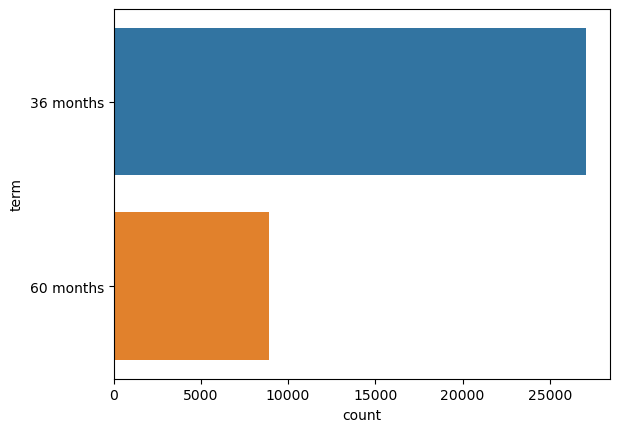

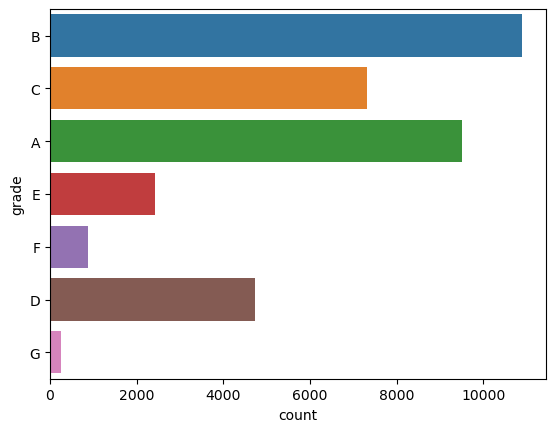

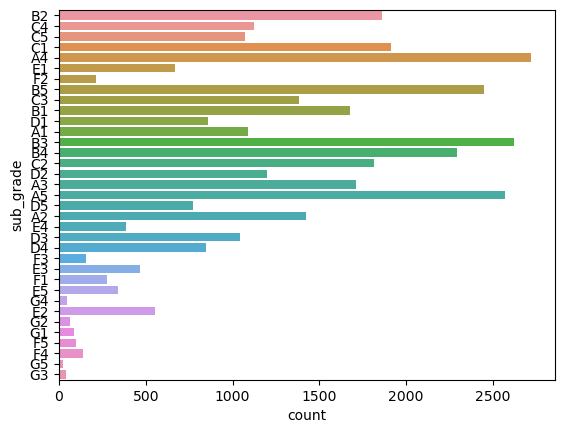

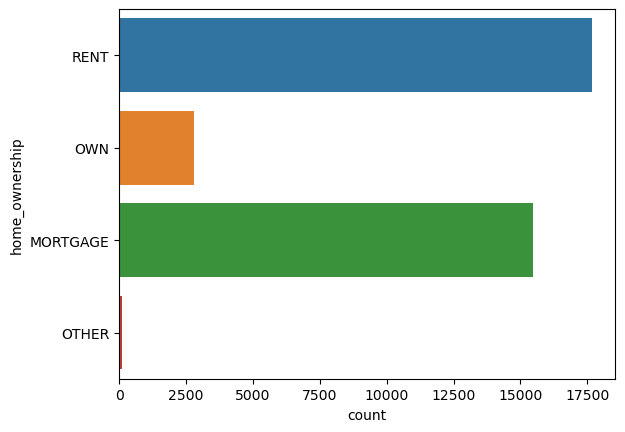

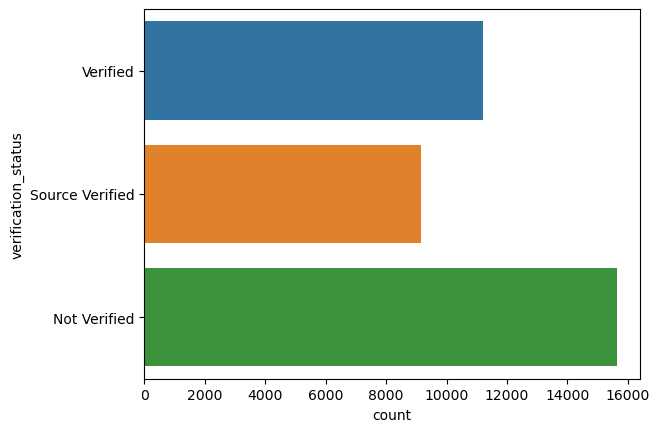

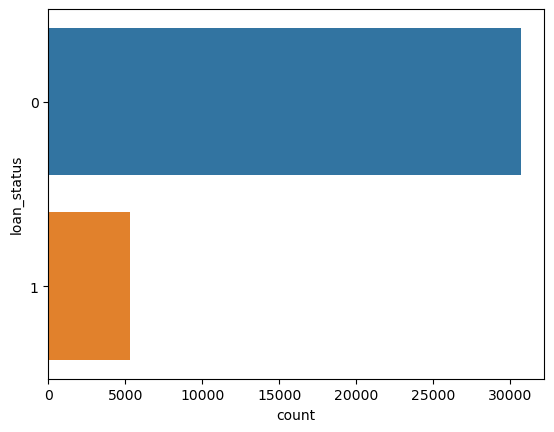

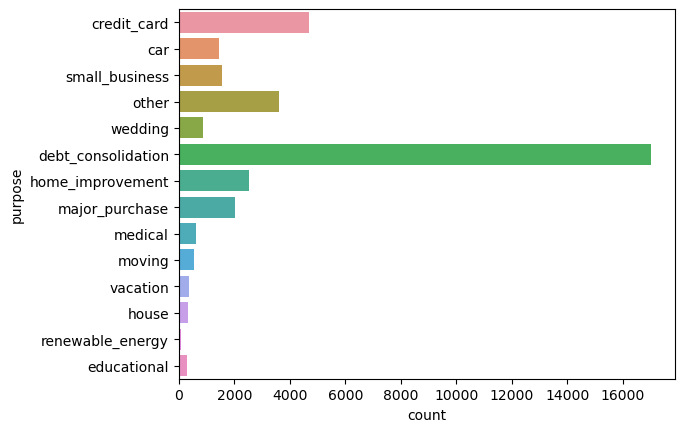

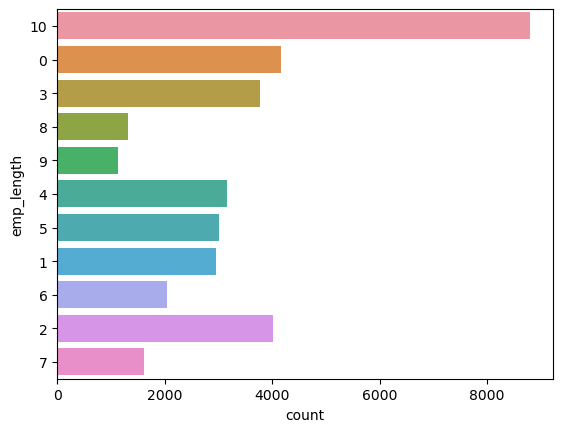

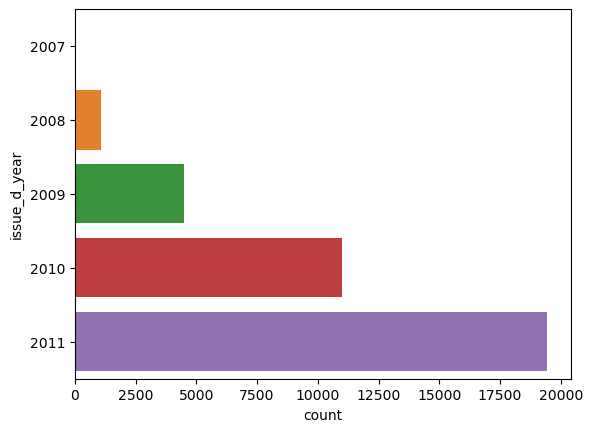

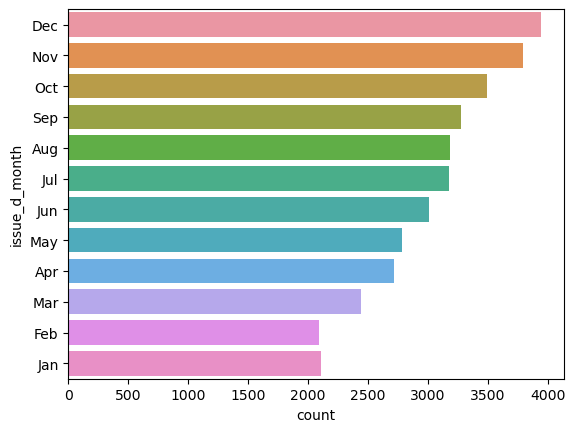

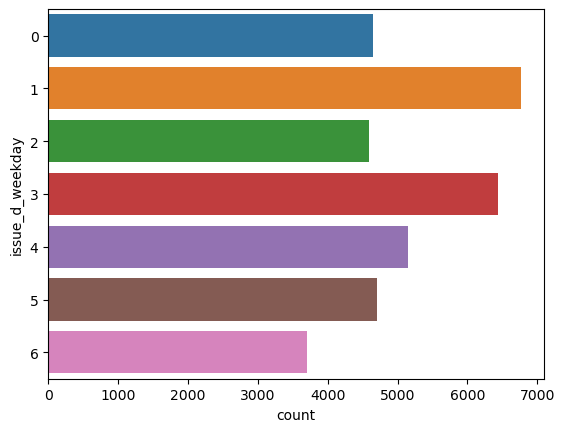

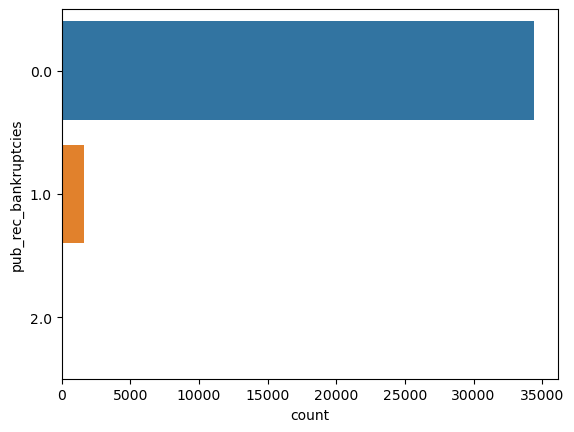

In [56]:
for i in cat_variable:
    sns.countplot(y = loan_data[i])
    plt.show()

## Bivariate Analysis 

- We are considering percentage instead of count for Categorical Variables i.e For Example if comparision is done between Term and Loan Status, then, We are displaying the following
- percentage of Charged Off Accounts that are having 36 months and 60 months.This total will be 100 percent.
- percentage of Fully Paid Accounts that are having 36 months and 60 months.This total will be 100 percent.





### creating bins for numerical values 
- int_rate
- annual_inc
- installment
- funded_amnt_inv
- loan_amnt

In [57]:
int_rate_bins = list(range(0,50, 5))
int_rate_labels =[ f"{str(index*5)} - {str(i)}" for index,i in enumerate(int_rate_bins[1:]) ]
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=int_rate_bins,labels=int_rate_labels)
loan_data['int_rate_groups']=loan_data['int_rate_groups'].astype('str')
loan_data.int_rate_groups.value_counts().sort_index()


10 - 15    17005
15 - 20     6761
20 - 25      673
5 - 10     11557
Name: int_rate_groups, dtype: int64

In [58]:
salary_bins = list(range(0,6100000, 20000))
salary_labels =[ f"{str((index*20000)/1000)}k - {str(i/1000)}k" for index,i in enumerate(salary_bins[1:]) ]
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=salary_bins,labels=salary_labels)
loan_data['annual_inc_groups']=loan_data['annual_inc_groups'].astype('str')
loan_data.annual_inc_groups.value_counts()

40.0k - 60.0k      11089
20.0k - 40.0k       8333
60.0k - 80.0k       7491
80.0k - 100.0k      4444
100.0k - 120.0k     2280
120.0k - 140.0k     1207
0.0k - 20.0k        1140
140.0k - 160.0k       12
Name: annual_inc_groups, dtype: int64

In [59]:
installment_bins = list(range(0,2000, 200))
installment_labels =[ f"{str(index*200)} - {str(i)}" for index,i in enumerate(installment_bins[1:]) ]
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=installment_bins,labels=installment_labels)
loan_data['installment_groups']=loan_data['installment_groups'].astype('str')
loan_data.installment_groups.value_counts().sort_index()


0 - 200        12595
1000 - 1200      123
1200 - 1400       34
200 - 400      13978
400 - 600       6035
600 - 800       2227
800 - 1000      1004
Name: installment_groups, dtype: int64

In [60]:
funded_amnt_inv_bins = list(range(-1,70000, 5000))
funded_amnt_inv_labels =[ f"{str(index*5000)} - {str(i)}" for index,i in enumerate(funded_amnt_inv_bins[1:]) ]
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=funded_amnt_inv_bins,labels=funded_amnt_inv_labels)
loan_data['funded_amnt_inv_group']=loan_data['funded_amnt_inv_group'].astype('str')
loan_data.funded_amnt_inv_group.value_counts().sort_index()

0 - 4999          8640
10000 - 14999     7856
15000 - 19999     3992
20000 - 24999     2102
25000 - 29999      579
30000 - 34999      411
35000 - 39999       71
5000 - 9999      12345
Name: funded_amnt_inv_group, dtype: int64

In [61]:
loan_amnt_inv_bins = list(range(-1,70000, 5000))
loan_amnt_inv_labels =[ f"{str(index*5000)} - {str(i)}" for index,i in enumerate(loan_amnt_inv_bins[1:]) ]
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=loan_amnt_inv_bins,labels=loan_amnt_inv_labels)
loan_data['loan_amnt_groups']=loan_data['loan_amnt_groups'].astype('str')
loan_data.loan_amnt_groups.value_counts().sort_index()

0 - 4999          7188
10000 - 14999     8156
15000 - 19999     4305
20000 - 24999     2680
25000 - 29999     1360
30000 - 34999      371
35000 - 39999      429
5000 - 9999      11507
Name: loan_amnt_groups, dtype: int64

In [62]:
dti_bins = list(range(-1,50, 5))
dti_labels =[ f"{str(index*5)} - {str(i)}" for index,i in enumerate(dti_bins[1:]) ]
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=dti_bins,labels=dti_labels)
loan_data['dti_groups']=loan_data['dti_groups'].astype('str')
loan_data.dti_groups.value_counts()

10 - 14    8736
15 - 19    8663
20 - 24    6980
5 - 9      6612
0 - 4      3366
25 - 29    1551
30 - 34      88
Name: dti_groups, dtype: int64

In [63]:
# Viewing new bins created
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,int_rate_groups,annual_inc_groups,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,0,credit_card,27.65,0.0,2011,Dec,3,10 - 15,20.0k - 40.0k,0 - 200,0 - 4999,5000 - 9999,25 - 29
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,1,car,1.00,0.0,2011,Dec,3,15 - 20,20.0k - 40.0k,0 - 200,0 - 4999,0 - 4999,0 - 4
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,0,small_business,8.72,0.0,2011,Dec,3,15 - 20,0.0k - 20.0k,0 - 200,0 - 4999,0 - 4999,5 - 9
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,0,other,20.00,0.0,2011,Dec,3,10 - 15,40.0k - 60.0k,200 - 400,10000 - 14999,10000 - 14999,20 - 24
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,0,wedding,11.20,0.0,2011,Dec,3,5 - 10,20.0k - 40.0k,0 - 200,5000 - 9999,5000 - 9999,10 - 14


### Loan Status vs Purpose



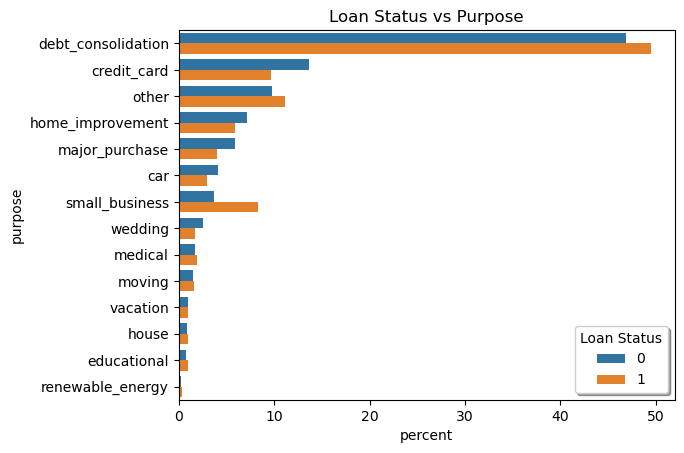

In [64]:
grouped_values=(loan_data
        .groupby('loan_status')['purpose']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='percent',y='purpose',hue='loan_status',
                    
                 ).set(title=f'Loan Status vs Purpose')
plt.legend(title='Loan Status', loc='lower right',shadow=True )
plt.show()

- From the Above graph, we can infer that Charged-Off accounts have high percentage for Small business & Other compared to Fully Paid

### Loan Status vs Term


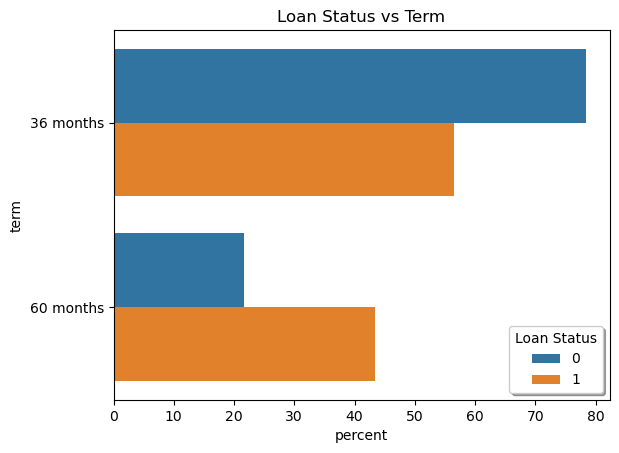

In [65]:
grouped_values=(loan_data
        .groupby('loan_status')['term']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='percent',y='term',hue='loan_status').set(title=f'Loan Status vs Term')
plt.legend(title='Loan Status', loc='lower right',shadow=True )
plt.show()

From the above graph, we can infer the following
- 45% Charged-Off accounts have  opted for 60 months and remaining 55% of Charged Off accounts have opted for 36 Terms
- 22% Fully Paid accounts have opted for 60 months and remaining 78% Paid Off accounts have opted for 36 Terms

- Based on this we could infer that, People opting for 60 Months are tend to have high probability of Charge Off as compared to fully paid

### Loan Status vs Verification Status



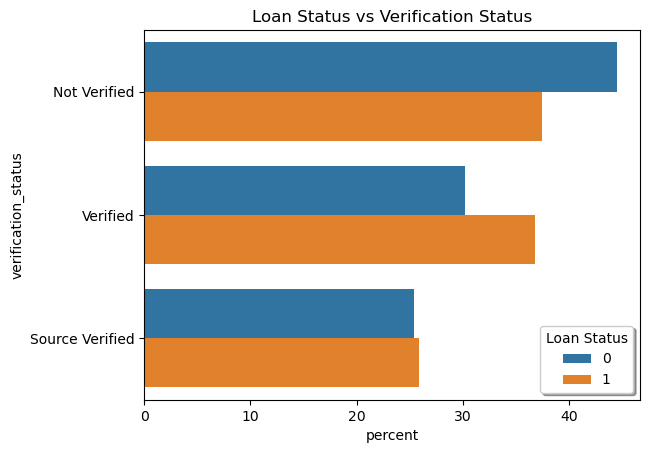

In [66]:
grouped_values=(loan_data
        .groupby('loan_status')['verification_status']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='percent',y='verification_status',hue='loan_status').set(title=f'Loan Status vs Verification Status')
plt.legend(title='Loan Status', loc='lower right',shadow=True )
plt.show()

- From the above graph, we can infer that Verified accounts have high percentage of Charge Off accounts compared to Fully Paid

### Loan Status vs Home Ownership
 

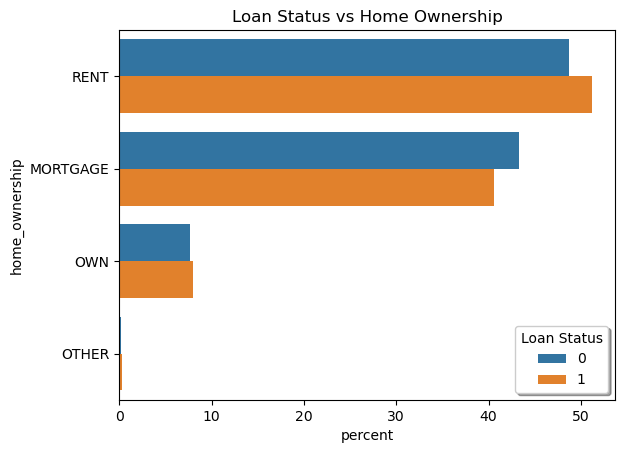

In [67]:
grouped_values=(loan_data
        .groupby('loan_status')['home_ownership']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='percent',y='home_ownership',hue='loan_status').set(title=f'Loan Status vs Home Ownership')
plt.legend(title='Loan Status', loc='lower right',shadow=True )
plt.show()

- From the above graph, we can infer people living in a rented house have slightly high percentage of Charge Off compared to Fully Paid.

### Loan Status vs Grade



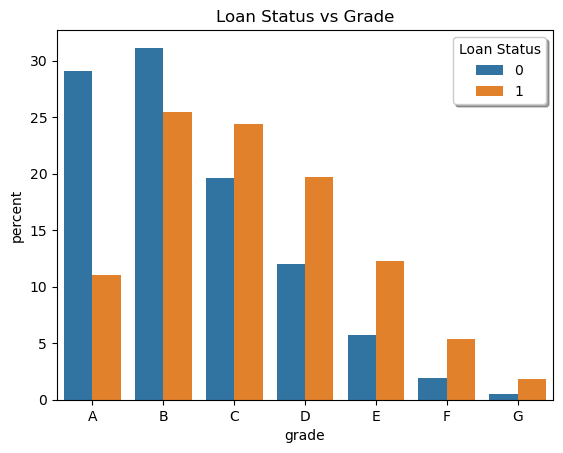

In [68]:
grouped_values=(loan_data
        .groupby('loan_status')['grade']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , y='percent',x='grade',hue='loan_status',
            order=sorted(grouped_values.grade.value_counts().index)
            ).set(title=f'Loan Status vs Grade')
plt.legend(title='Loan Status', loc='upper right',shadow=True )
plt.show()

From the above graph, we can infer the following
- 65% Charge Off accounts belong to Grade C,D,E,F  where as only 42% of Fully Paid Accounts belong to these Grades
- 14% Charge Off accounts belong to Grade A where as 28% of Fully Paid Accounts belong to Grade A

So its clear that, People belonging to Grade A has low probability of becoming Charge-Off, whereas people belonging to 
Grade C,D,E,F has high probaility of becoming Charge-Off

### Loan Status vs Annual Income 



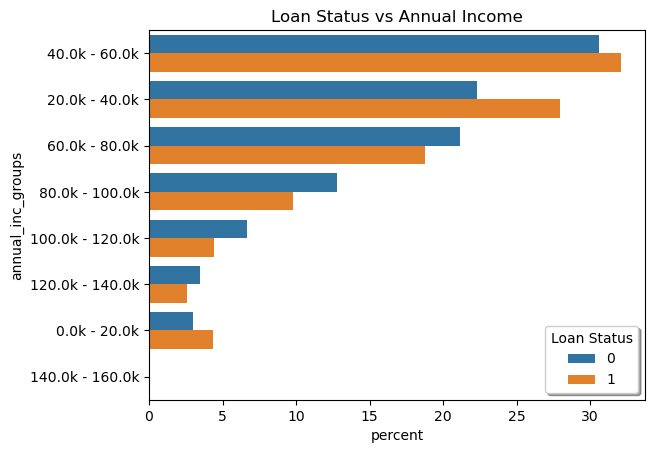

In [69]:

grouped_values=(loan_data
        .groupby('loan_status')['annual_inc_groups']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='percent',y='annual_inc_groups',hue='loan_status',
             ).set(title=f'Loan Status vs Annual Income')
plt.legend(title='Loan Status', loc='lower right',shadow=True )
plt.show()

- From the above graph, we can infer that Annual Income in the range 0-20K, 20k-40k, 40k-60k has high percentage of Charge Off accounts compared to Fully Paid Accounts 

### Loan Status vs DTI



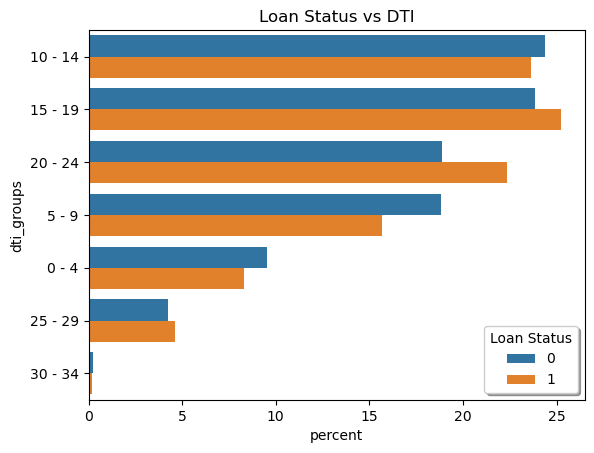

In [70]:
grouped_values=(loan_data
        .groupby('loan_status')['dti_groups']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='percent',y='dti_groups',hue='loan_status').set(title=f'Loan Status vs DTI')
plt.legend(title='Loan Status', loc='lower right',shadow=True )
plt.show()

- From the above graph, we can infer that DTI in the range of 15-19, 20-24 has high percentage of Charge Off accounts compared to Fully Paid Accounts 

### Loan Status vs Installment



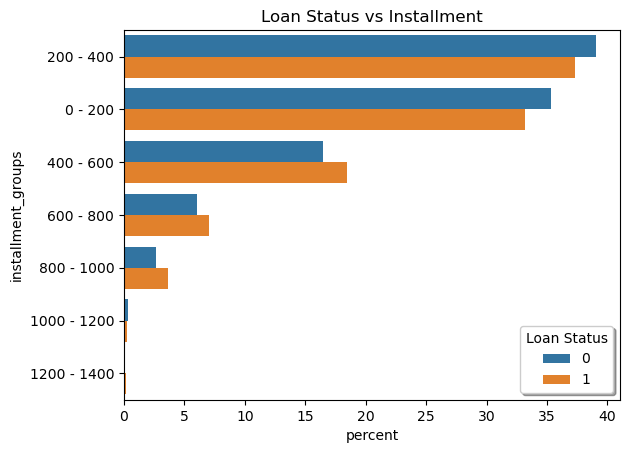

In [71]:
grouped_values=(loan_data
        .groupby('loan_status')['installment_groups']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='percent',y='installment_groups',hue='loan_status').set(title=f'Loan Status vs Installment')
plt.legend(title='Loan Status', loc='lower right',shadow=True )
plt.show()

- From the above graph, we can infer that percentange of Charge Off accounts is higher with installment greater than 400 
 compared to Fully Paid

### Loan Status vs Interest Rate


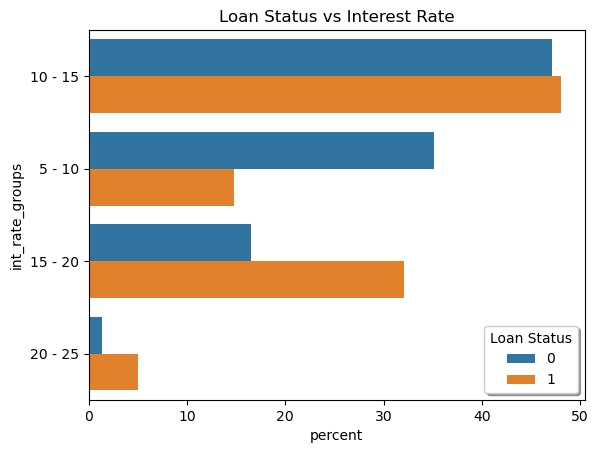

In [72]:
grouped_values=(loan_data
        .groupby('loan_status')['int_rate_groups']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='percent',y='int_rate_groups',hue='loan_status').set(title=f'Loan Status vs Interest Rate')
plt.legend(title='Loan Status', loc='lower right',shadow=True )
plt.show()

- From the above graph, we can infer that 40% of the Charge Off accounts have interest rate in the range of 15-25% where as only 20% of Fully Paid accounts have interest rate in this range.

- So accounts having interest rate in the range of 15-25% has high probability of becoming Charged-Off

### Loan Status vs Funded Amount Inv


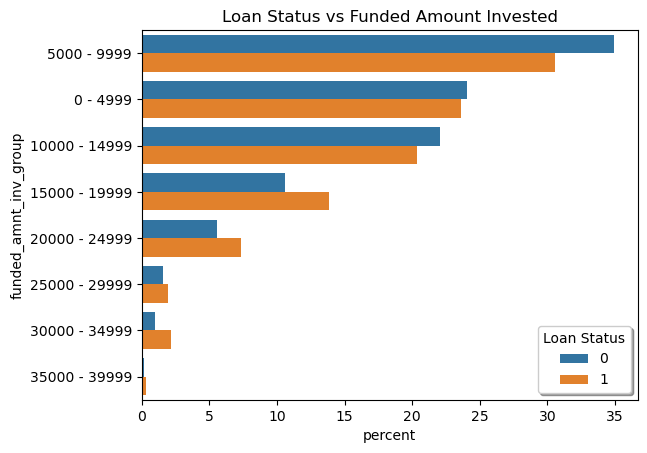

In [73]:
grouped_values=(loan_data
        .groupby('loan_status')['funded_amnt_inv_group']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='percent',y='funded_amnt_inv_group',hue='loan_status').set(title=f'Loan Status vs Funded Amount Invested')
plt.legend(title='Loan Status', loc='lower right',shadow=True )
plt.show()

- From the above graph, we can infer that percentage of Charge Off accounts is high when the amount funded  by investor is in the range of  15000-25000 

### Loan Status vs Loan Amount


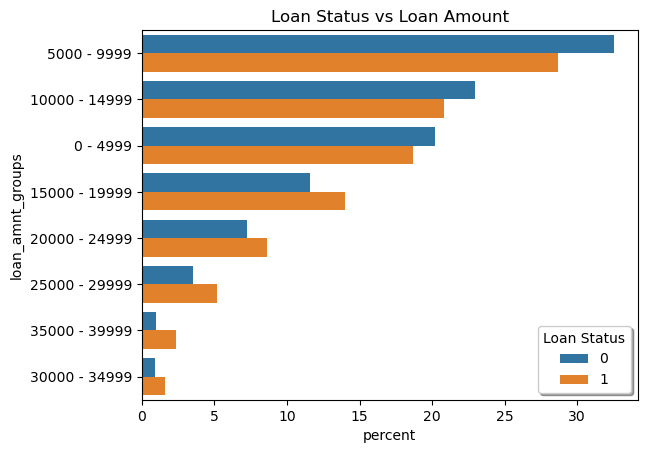

In [74]:
grouped_values=(loan_data
        .groupby('loan_status')['loan_amnt_groups']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='percent',y='loan_amnt_groups',hue='loan_status').set(title=f'Loan Status vs Loan Amount')
plt.legend(title='Loan Status', loc='lower right',shadow=True )
plt.show()

- From the above graph, we can infer that percentage of Charge Off accounts is high when the amount applied for loan is greater than 14999 compared to Fully Paid

### Loan Status vs Employee Experience


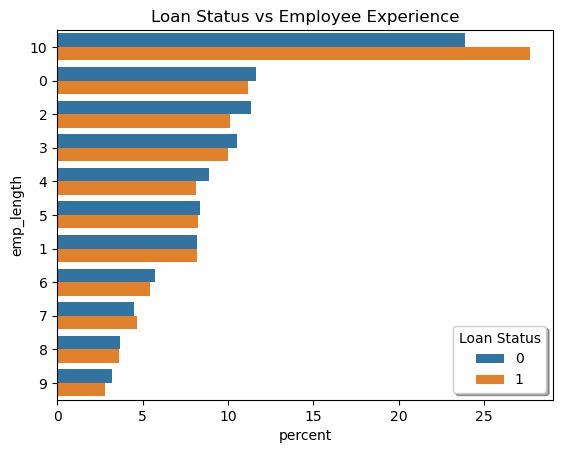

In [75]:
grouped_values=(loan_data
        .groupby('loan_status')['emp_length']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='percent',y='emp_length',hue='loan_status').set(title=f'Loan Status vs Employee Experience')
plt.legend(title='Loan Status', loc='lower right',shadow=True )
plt.show()

- From the above graph, we can infer that percentage of Charge Off accounts is high when the employee experience is 10+

### Loan Status vs Issue Year


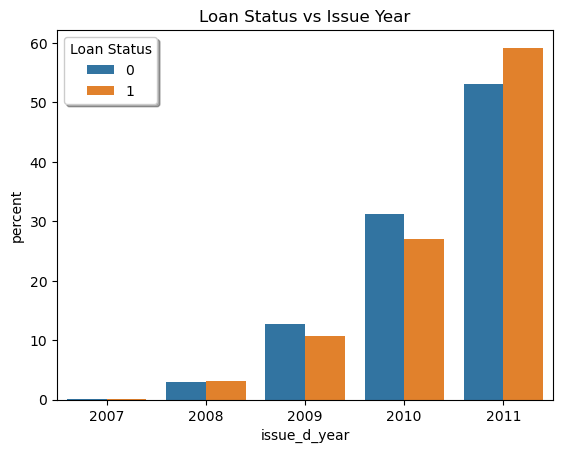

In [76]:
grouped_values=(loan_data
        .groupby('loan_status')['issue_d_year']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='issue_d_year',y='percent',hue='loan_status').set(title=f'Loan Status vs Issue Year')
plt.legend(title='Loan Status', loc='upper left',shadow=True )
plt.show()

- From the above graph, we can infer that percentage of Charge Off accounts is slightly high in 2011

### Loan Status vs Issue Month


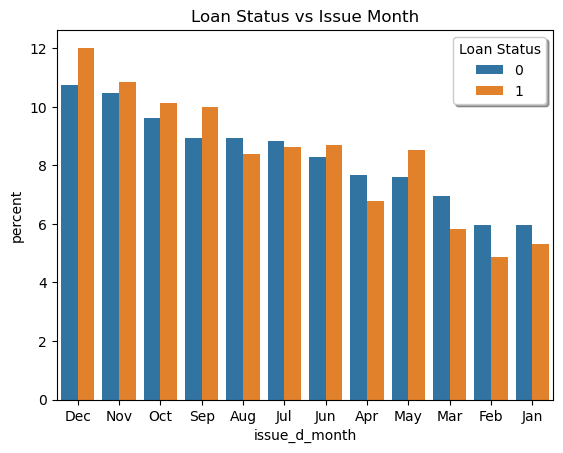

In [77]:
grouped_values=(loan_data
        .groupby('loan_status')['issue_d_month']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(data=grouped_values
                , x='issue_d_month',y='percent',hue='loan_status',ci=None).set(title=f'Loan Status vs Issue Month')
plt.legend(title='Loan Status', loc='upper right',shadow=True )

- From the above graph, we can infer that percentage of Charge Off accounts is slightly high in May, Jun, Sep, Oct, Nov and Dec compared to Fully Paid

### Loan Status vs Issue Day


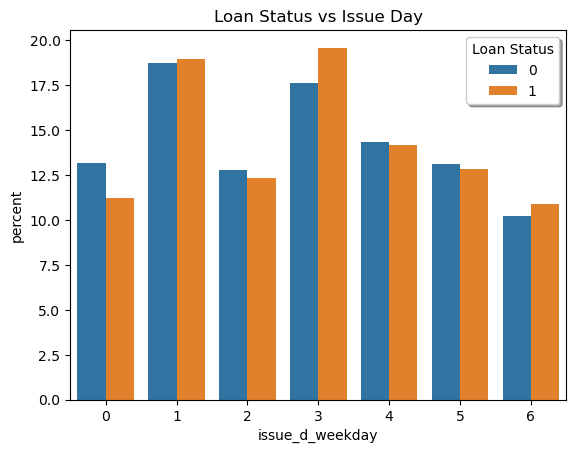

In [78]:
grouped_values=(loan_data
        .groupby('loan_status')['issue_d_weekday']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        )
g=sns.barplot(grouped_values
                , x='issue_d_weekday',y='percent',hue='loan_status').set(title=f'Loan Status vs Issue Day')
plt.legend(title='Loan Status', loc='upper right',shadow=True )

plt.show()

- From the above graph, we can infer that percentage of Charge Off accounts is slightly high on 3 and 6 

### Annual Income with Purpose
 


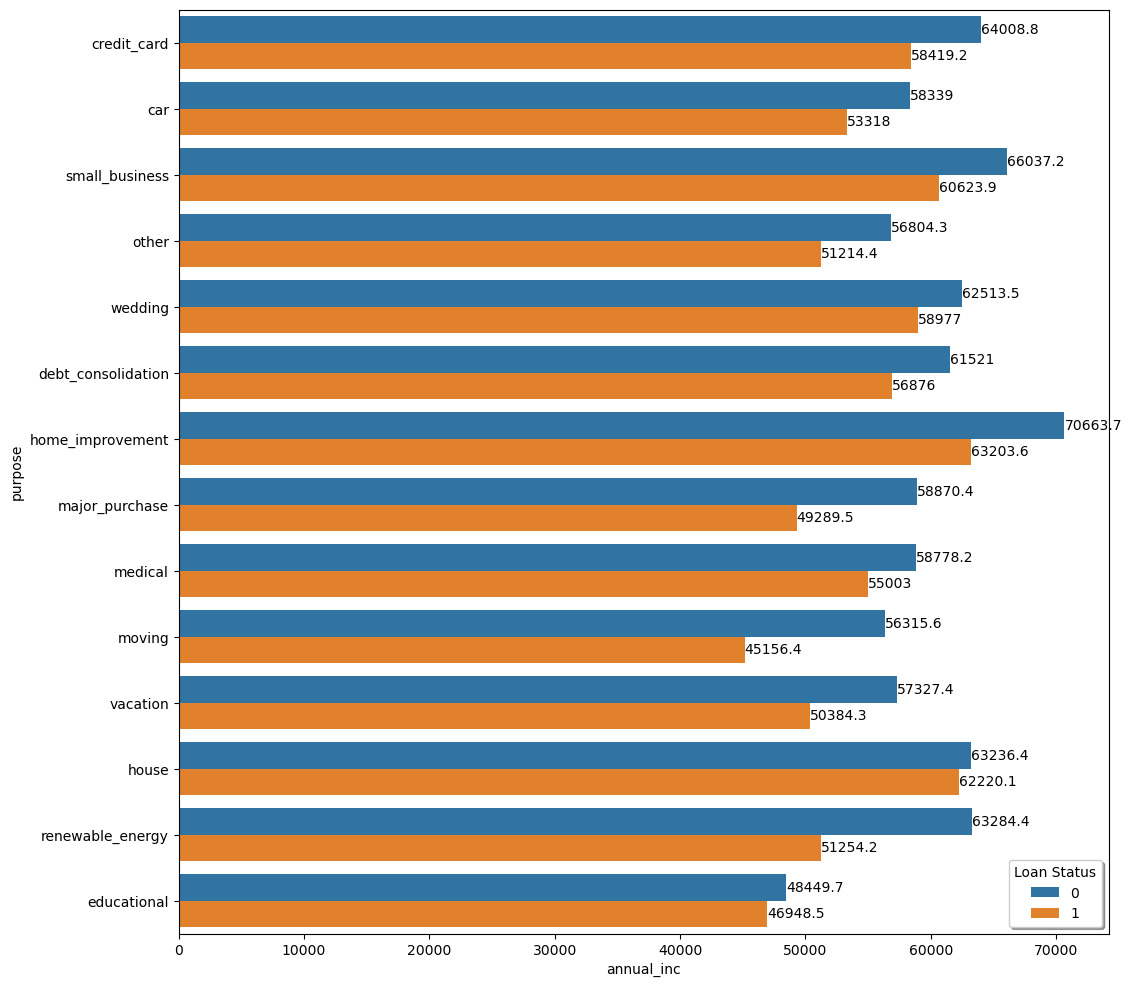

In [79]:
plt.figure(figsize=(12,12))
ax=sns.barplot(x = "annual_inc", y = "purpose", hue = 'loan_status', data = loan_data,ci=None)
plt.legend(title='Loan Status', loc='lower right',shadow=True )
for i in ax.containers:
    ax.bar_label(i,)

- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

### DTI Vs Int Rate



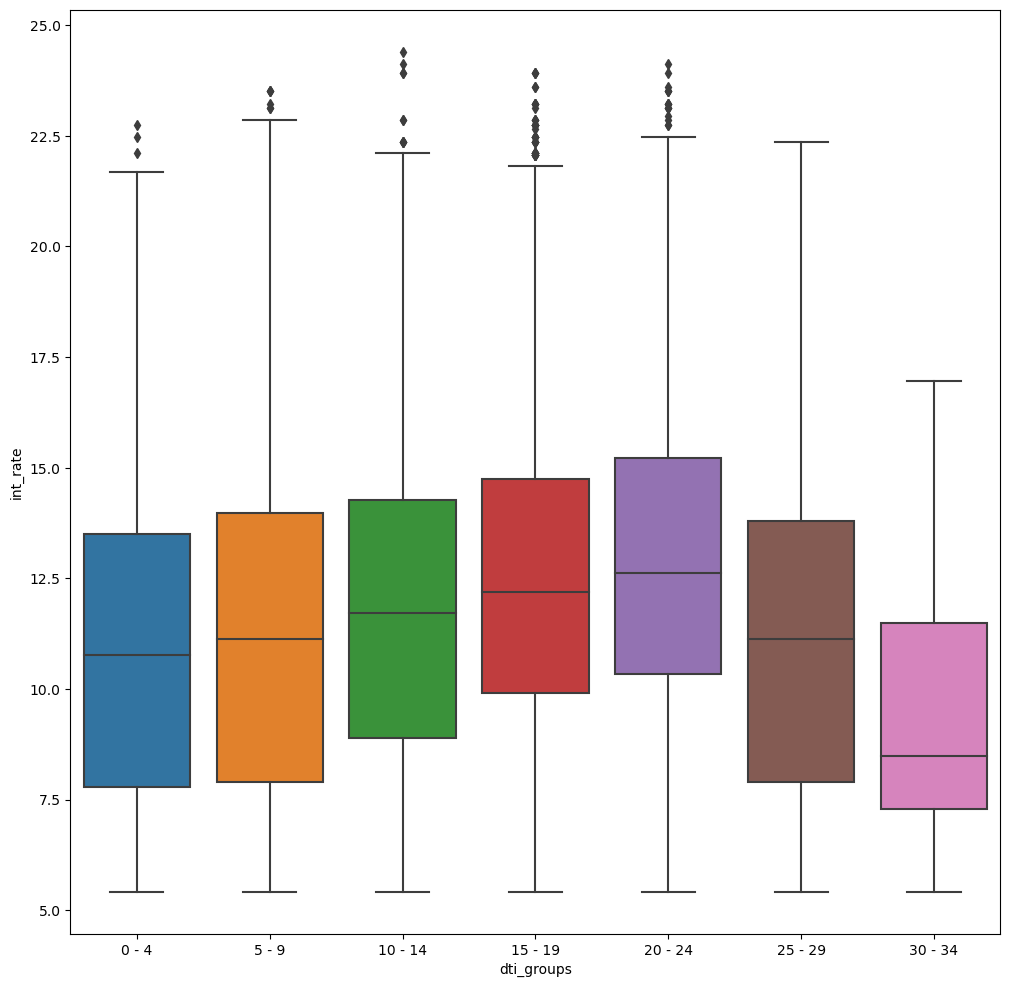

In [80]:
plt.figure(figsize=(12,12))
ax=sns.boxplot(y = "int_rate", x = "dti_groups", data = loan_data,
               order=sorted(loan_data.dti_groups.value_counts().index,key=lambda x : int(x.split('-')[0])))
plt.show()

- Mostly DTI is increasing with increase in interest rate

### Annual Income vs Emp Exp


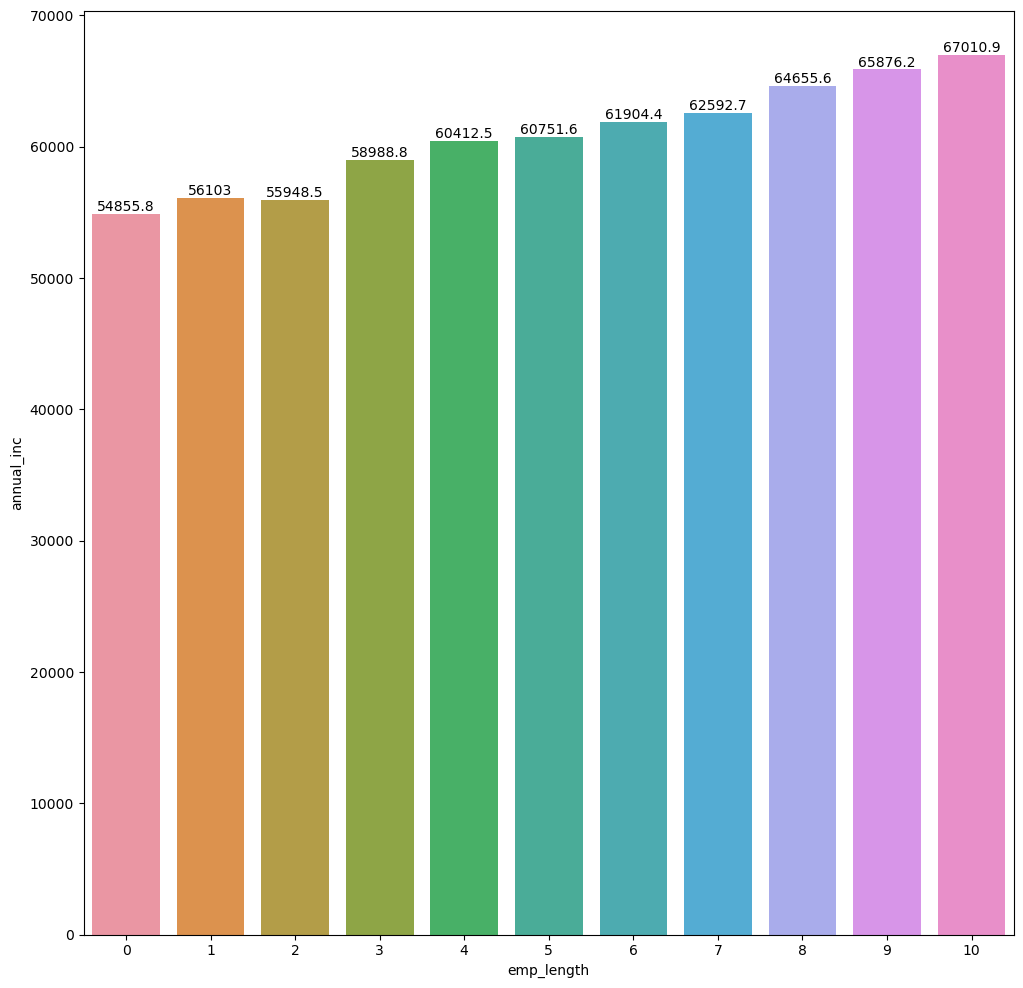

In [81]:
plt.figure(figsize=(12,12))
ax=sns.barplot(y = "annual_inc", x = "emp_length", data = loan_data,ci=None,
               order=sorted(loan_data.emp_length.value_counts().index,key=lambda x : int(x)))
for i in ax.containers:
    ax.bar_label(i,)

- Annual Income is increasing with increase in Experience

### Annual Income vs Loan Amnt


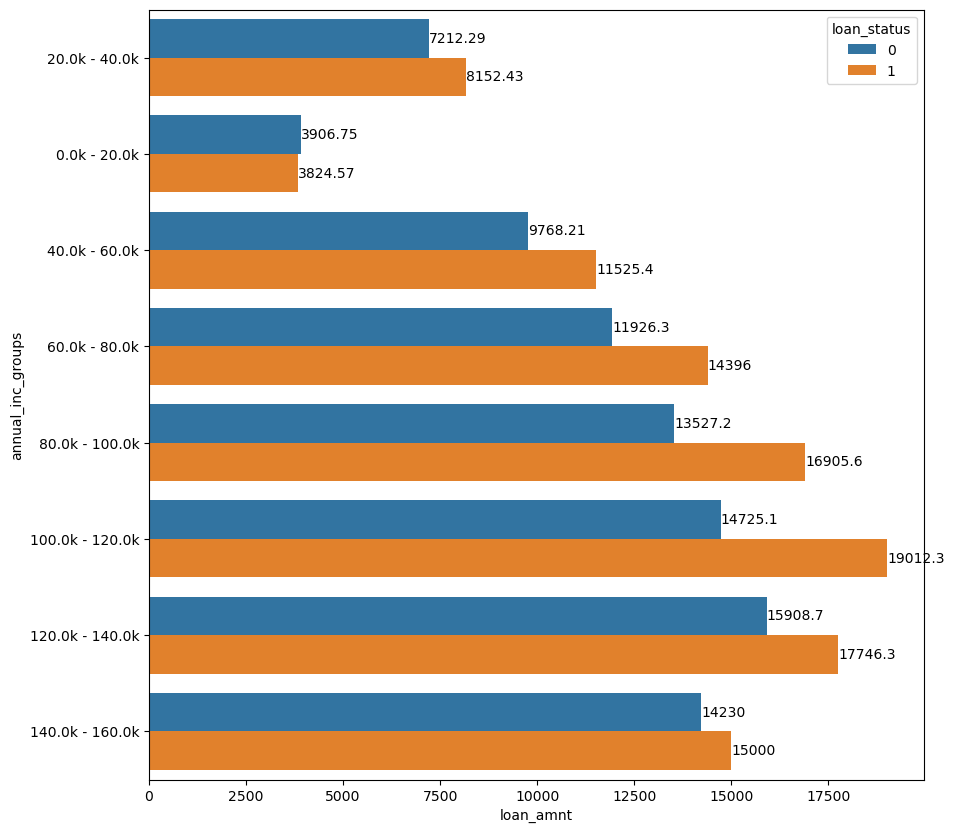

In [82]:
plt.figure(figsize=(10,10))
ax=sns.barplot(y = "annual_inc_groups", x = "loan_amnt", hue = 'loan_status', data = loan_data,ci=None)
for i in ax.containers:
    ax.bar_label(i,)

- Across all the income groups, the loan_amount is higher for people who defaulted.

### Multi Variate Analysis using Pair Plots on Numeric Columns



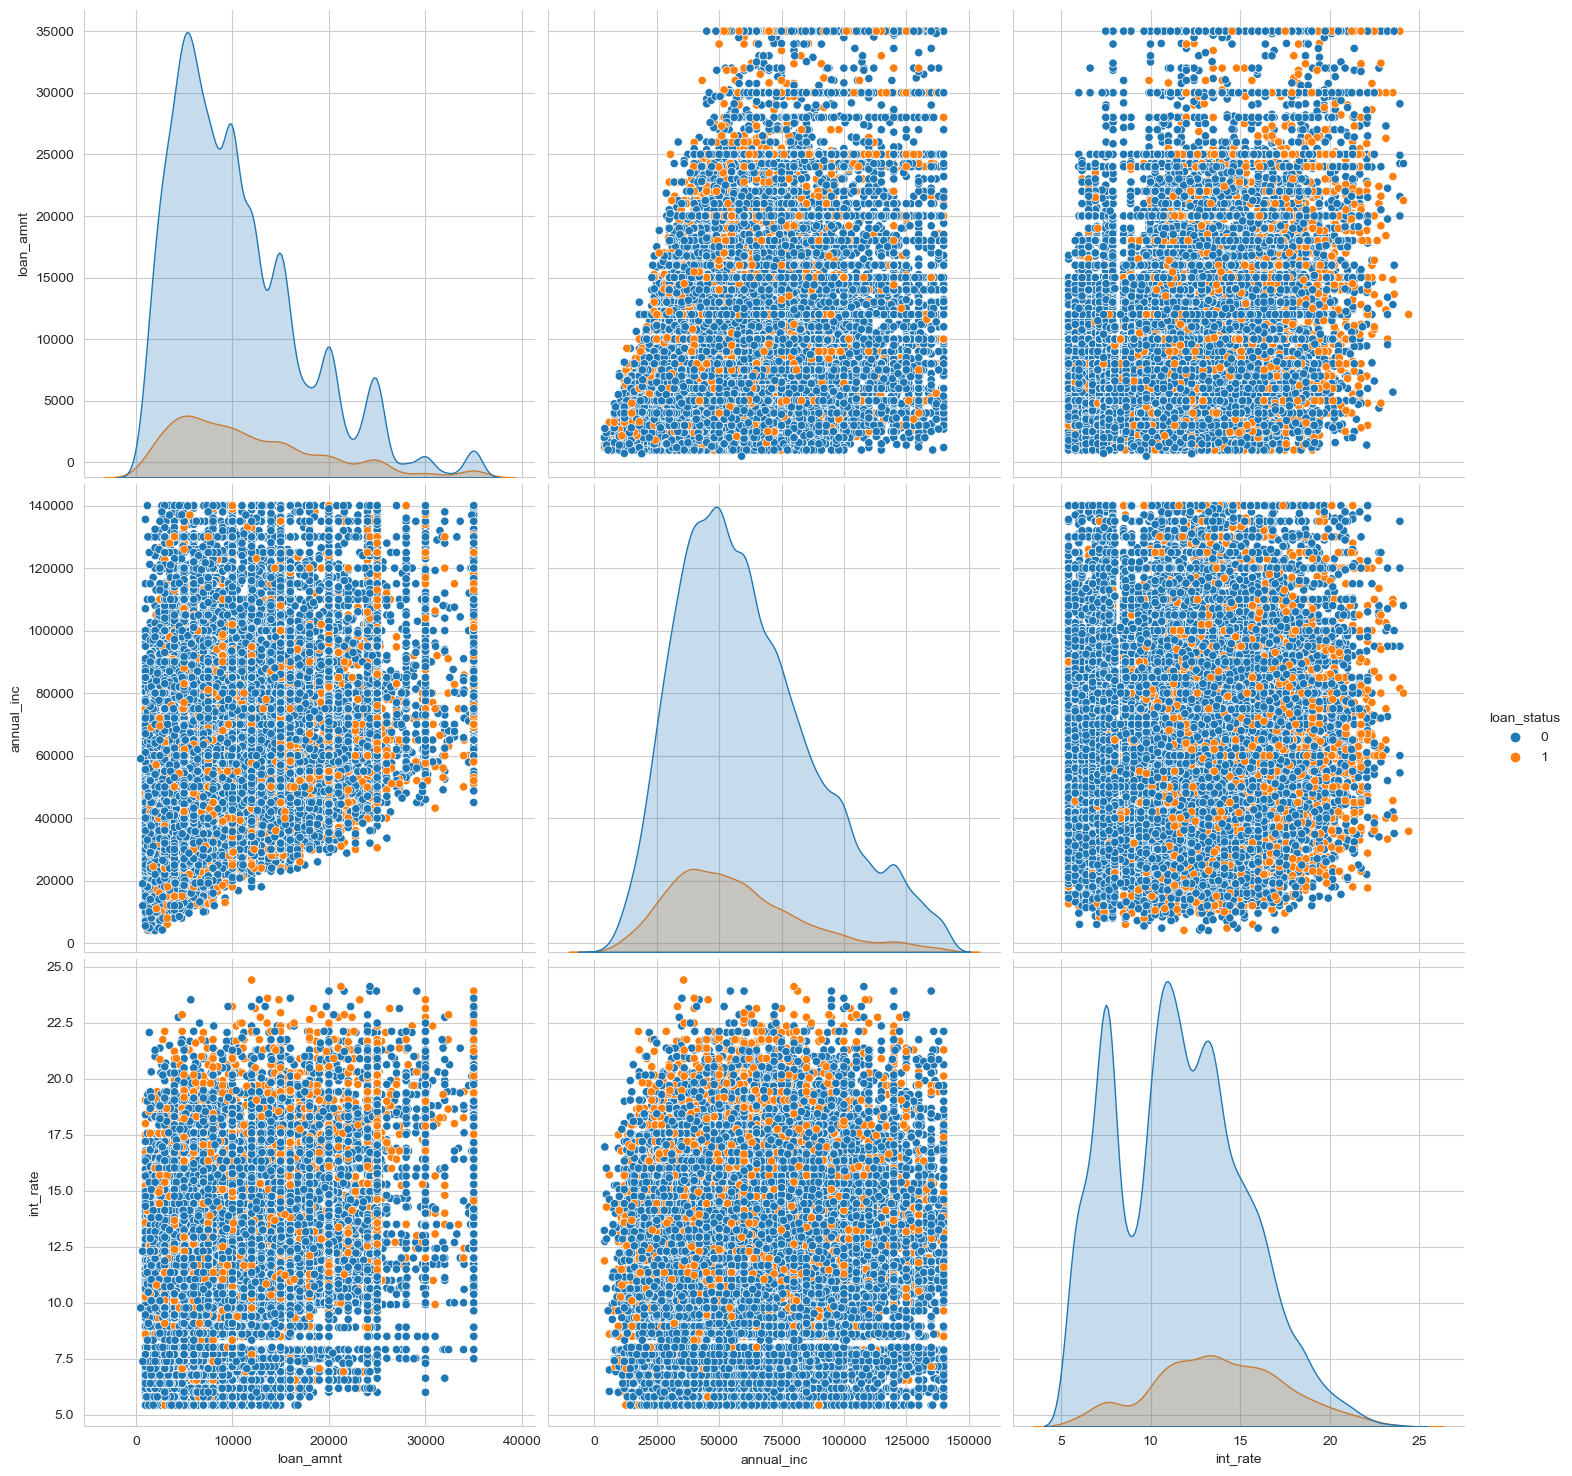

In [83]:
column_pairs=['loan_amnt', 'annual_inc', 'int_rate','loan_status']
sns.set_style("whitegrid")
sns.pairplot(loan_data[column_pairs],hue="loan_status",height=5)
plt.show()

- Higher the annual income higher the loan amount slightly.
- intrest rate is increasing with loan amount increase

### Correlation Matrix


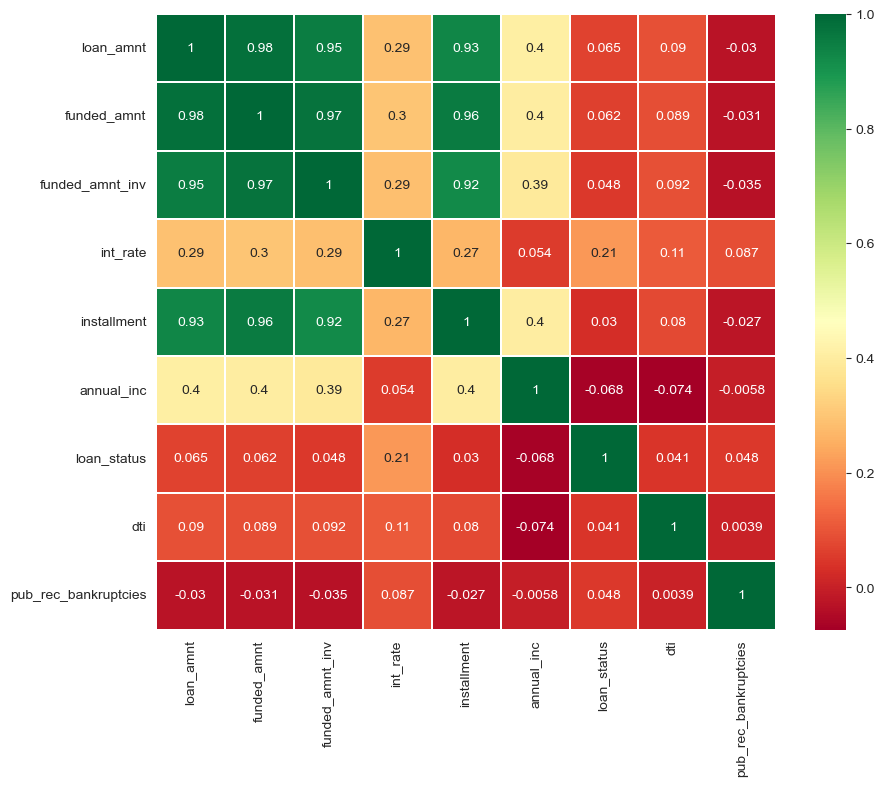

In [84]:
sns.heatmap(loan_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

From the above correlation Matrix, we could interpret that
- Loan Amount & Funded Amount has highest positive correlation
- There are variables that  have negative  correlation also Ex: annual_inc vs dti
- There are variables that almost have zero correlation Ex:public_rec_bankruptcies vs  dti

# Recommendations

The above analysis with respect to the charged off loans vs Full Paid Loans for each variable suggests the following.There is a more probability of defaulting when :
- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts or who have applied for small business
- Applicants who receive interest at the rate of 15-25%
- Applicants who have an income of range 0k -60k
- Applicants with employment length of 10 +
- When funded amount by investor is between 15000-19999
- Loan amount is between 15000-29999
- Dti is between 15-19
- When monthly installments are between 400-600
- Term of 60 months
- When the loan status is Verified
- Grade is 'C','D','E','F','G'
- Issued on weekday no 3 and 6
- Issued in Dec month 
- Issued in 2011 year